# **Cosine Similarity**

Cosine Similarity adalah metode untuk mengukur seberapa mirip dua vektor dengan menghitung cosinus sudut antara kedua vektor tersebut dalam ruang dimensi tinggi. Dalam konteks teks, setiap dokumen atau kalimat dipetakan ke dalam vektor berdasarkan frekuensi kata (sering menggunakan TF-IDF), dan cosine similarity digunakan untuk mengukur kemiripan antara dua dokumen atau kalimat.

## Hubungan Berita Dengan Berita

In [ ]:
!pip install PySastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 3.2 MB/s eta 0:00:00


In [ ]:
import nltk
import re
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import pandas as pd
from nltk.corpus import stopwords

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/KULIAH/SEMESTER 7/PPW/berita_cleaned.csv")

In [ ]:
data.head()

,Judul Berita,Isi Berita,Tanggal Berita,Kategori Berita,Kategori,cleansing,case_folding,tokenize,no_stopwords,stemmed,stemmed_text
0,Kedubes RI di Tunisia Ajak Jelajahi Keindahan ...,"TIMESINDONESIA, BANYUWANGI – Kedutaan Besar Re...",08/09/2024 - 19:47,Wisata,1,TIMESINDONESIA BANYUWANGI Kedutaan Besar Repu...,timesindonesia banyuwangi kedutaan besar repu...,"['timesindonesia', 'banyuwangi', 'kedutaan', '...","['timesindonesia', 'banyuwangi', 'kedutaan', '...","['timesindonesia', 'banyuwangi', 'duta', 'repu...",timesindonesia banyuwangi duta republik indone...
1,Rekomendasi Hotel Bintang 5 di Kawasan Puncak ...,"TIMESINDONESIA, CIANJUR – Berlibur atau melaku...",08/09/2024 - 09:00,Wisata,1,TIMESINDONESIA CIANJUR Berlibur atau melakuka...,timesindonesia cianjur berlibur atau melakuka...,"['timesindonesia', 'cianjur', 'berlibur', 'ata...","['timesindonesia', 'cianjur', 'berlibur', 'per...","['timesindonesia', 'cianjur', 'libur', 'jalan'...",timesindonesia cianjur libur jalan bisnis cian...
2,Menikmati Sensasi Petik Melon di Desa Balongwo...,"TIMESINDONESIA, MOJOKERTO – Ketika bosan denga...",07/09/2024 - 13:09,Wisata,1,TIMESINDONESIA MOJOKERTO Ketika bosan dengan ...,timesindonesia mojokerto ketika bosan dengan ...,"['timesindonesia', 'mojokerto', 'ketika', 'bos...","['timesindonesia', 'mojokerto', 'bosan', 'buah...","['timesindonesia', 'mojokerto', 'bosan', 'buah...",timesindonesia mojokerto bosan buah melon pasa...
3,Sejumlah Influencer Kepincut Pelayanan dan Fas...,"TIMESINDONESIA, BANYUWANGI – Luminor Hotel Ban...",07/09/2024 - 06:08,Wisata,1,TIMESINDONESIA BANYUWANGI Luminor Hotel Banyu...,timesindonesia banyuwangi luminor hotel banyu...,"['timesindonesia', 'banyuwangi', 'luminor', 'h...","['timesindonesia', 'banyuwangi', 'luminor', 'h...","['timesindonesia', 'banyuwangi', 'luminor', 'h...",timesindonesia banyuwangi luminor hotel banyuw...
4,5 Pantai Unik dan Cantik Masuk Kawasan TN Mata...,"TIMESINDONESIA, SUMBA TIMUR – Ternyata di Pula...",01/09/2024 - 14:16,Wisata,1,TIMESINDONESIA SUMBA TIMUR Ternyata di Pulau ...,timesindonesia sumba timur ternyata di pulau ...,"['timesindonesia', 'sumba', 'timur', 'ternyata...","['timesindonesia', 'sumba', 'timur', 'pulau', ...","['timesindonesia', 'sumba', 'timur', 'pulau', ...",timesindonesia sumba timur pulau sumba pantai ...


### Transformasi TF-IDF


$$
\text{TF}(t, d) = \frac{\text{Jumlah kemunculan term } t \text{ dalam dokumen } d}{\text{Total kata dalam dokumen } d}
$$

$$
\text{IDF}(t) = \log\left(\frac{N}{n_t}\right)
$$

Keterangan:

$N = \text{total jumlah dokumen}$

$n_t = \text{jumlah dokumen yang mengandung term } t$


TF-IDF dihitung dengan mengalikan TF dan IDF:

$$\text{TF-IDF}(t, d) = \text{TF}(t, d) \times \text{IDF}(t)$$


        

In [ ]:
# Menggunakan fitur 'stemmed_text' untuk TF-IDF
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(data['stemmed_text'])
tfidf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.23597042],
       [0.        , 0.06995798, 0.01397316, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.06721062, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.0278511 , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
tfidf.shape

(100, 1372)

### Menghitung Cosine Similarity

Langkah-langkah menghitung Cosine Similarity:

1. Menghitung dot product => D1 . D2 dst
2. Menghitung Magnitudo Vektor
$$
\|D_1\| = \sqrt{a^2 + b^2 + c^2 + \ldots}
$$
3. Mengitung Cosine Similarity
$$\text{cosine}(D_1, D_2) = \frac{D_1 \cdot D_2}{\|D_1\| \cdot \|D_2\|}$$

In [ ]:
# Menghitung cosine similarity
cosine_sim_matrix = cosine_similarity(tfidf)

In [ ]:
# Membuat DataFrame hasil cosine similarity
data_cosine_sim = pd.DataFrame(cosine_sim_matrix, columns=[f'Berita {i+1}' for i in range(len(data))],
                              index=[f'Berita {i+1}' for i in range(len(data))])

print("Matriks Cosine Similarity:")
print(data_cosine_sim)

Matriks Cosine Similarity:
            Berita 1  Berita 2  Berita 3  Berita 4  Berita 5  Berita 6  \
Berita 1    1.000000  0.033715  0.038988  0.227385  0.036792  0.158212   
Berita 2    0.033715  1.000000  0.034185  0.257273  0.033903  0.264844   
Berita 3    0.038988  0.034185  1.000000  0.018931  0.026469  0.022777   
Berita 4    0.227385  0.257273  0.018931  1.000000  0.019545  0.422411   
Berita 5    0.036792  0.033903  0.026469  0.019545  1.000000  0.012972   
...              ...       ...       ...       ...       ...       ...   
Berita 96   0.033830  0.040070  0.016158  0.021167  0.033065  0.061876   
Berita 97   0.038033  0.129833  0.025392  0.017158  0.015652  0.010386   
Berita 98   0.087904  0.022142  0.026572  0.073139  0.025608  0.052874   
Berita 99   0.017121  0.110936  0.090797  0.110203  0.012787  0.069894   
Berita 100  0.016570  0.198635  0.034743  0.113989  0.010820  0.185915   

            Berita 7  Berita 8  Berita 9  Berita 10  ...  Berita 91  \
Berita 1    0

### Matrix Adjacency

In [ ]:
# Membuat Adjacency Matrix
def create_adjacency_matrix(cosine_sim_matrix, threshold=0.5):
    adjacency_matrix = (cosine_sim_matrix > threshold).astype(int)
    # np.fill_diagonal(adjacency_matrix, 0)  # Menghapus hubungan diri sendiri
    return adjacency_matrix

adj_matrix = create_adjacency_matrix(cosine_sim_matrix, threshold=0.1)

### Graph

In [ ]:
# Fungsi Menampilkan Graf
def draw_graph(adjacency_matrix):
    G = nx.from_numpy_array(adjacency_matrix)  # Ganti from_numpy_matrix dengan from_numpy_array
    pos = nx.spring_layout(G)  # Penataan node
    nx.draw(G, pos, with_labels=True, node_color='lightblue', font_weight='bold', node_size=500)

    # Menampilkan edge labels (jika ada)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # # Menampilkan jumlah node
    # num_nodes = G.number_of_nodes()
    # print(f"Jumlah node dalam graf: {num_nodes}")

    plt.title("Graph Berita")
    plt.show()

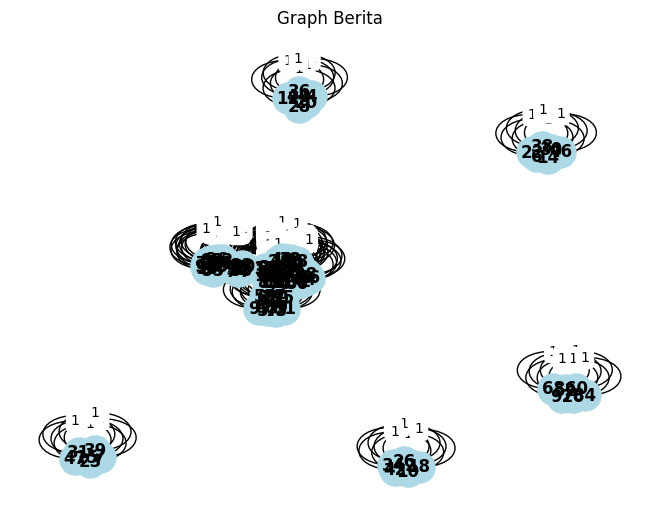

In [ ]:
# Tampilkan graf berdasarkan adjacency matrix
draw_graph(adj_matrix)

In [ ]:
# Mengubah Adjacency Matrix menjadi DataFrame menggunakan label berita
adjacency_df = pd.DataFrame(adj_matrix, columns=[f'Berita ke-{i+1}' for i in range(adj_matrix.shape[1])],
                                index=[f'Berita ke-{i+1}' for i in range(adj_matrix.shape[0])])
# Menampilkan Adjacency Matrix dalam bentuk DataFrame
print("Adjacency Matrix:")
adjacency_df

Adjacency Matrix:


,Berita ke-1,Berita ke-2,Berita ke-3,Berita ke-4,Berita ke-5,Berita ke-6,Berita ke-7,Berita ke-8,Berita ke-9,Berita ke-10,...,Berita ke-91,Berita ke-92,Berita ke-93,Berita ke-94,Berita ke-95,Berita ke-96,Berita ke-97,Berita ke-98,Berita ke-99,Berita ke-100
Berita ke-1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Berita ke-2,0,1,0,1,0,1,0,0,0,1,...,1,1,0,0,0,0,1,0,1,1
Berita ke-3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Berita ke-4,1,1,0,1,0,1,0,0,1,1,...,1,1,0,0,0,0,0,0,1,1
Berita ke-5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Berita ke-96,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,1
Berita ke-97,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
Berita ke-98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
Berita ke-99,0,1,0,1,0,0,0,0,0,1,...,1,0,0,1,1,0,0,0,1,0


## Ringkasan Dokumen

In [ ]:
# Download stopwords bahasa Indonesia
nltk.download('stopwords')

# Download nltk resources
nltk.download('punkt')

# Membuat objek stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Mendapatkan stopwords dalam bahasa Indonesia
stop_words_id = set(stopwords.words('indonesian'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Ekstrak Kalimat

In [ ]:
# Fungsi Ekstraksi Kalimat
def extract_sentences(text):
    sentences = sent_tokenize(text)
    return sentences

### Preprocessing

In [ ]:
# Fungsi Preprocessing
def preprocess_sentence(sentence):
   # Hapus URL
    clean_text = re.sub(r'https?://\S+|www\.\S+', '', sentence)
    # Hapus tag HTML
    clean_text = re.sub(r'<.*?>', '', clean_text)
    # Hapus angka
    clean_text = re.sub(r'\d+', '', clean_text)
    # Hapus simbol (selain huruf dan angka)
    clean_text = re.sub(r'[^a-zA-Z0-9\s]', '', clean_text)
    # Case folding: ubah ke huruf kecil
    clean_text = clean_text.lower()

    # Tokenisasi
    tokens = clean_text.split()
    # Hapus stopwords bahasa Indonesia
    tokens = [word for word in tokens if word not in stop_words_id]
    # Stemming menggunakan Sastrawi
    stemmed_tokens = [stemmer.stem(word) for word in tokens]

    # Menggabungkan kembali token yang telah diproses
    return ' '.join(stemmed_tokens)

### Transformasi TF-IDF

In [ ]:
# Fungsi TF-IDF
def compute_tfidf(sentences):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(sentences)
    return tfidf_matrix, vectorizer.get_feature_names_out()

### Menghitung Cosine Similarity

In [ ]:
# Fungsi Cosine Similarity
def compute_cosine_similarity(tfidf_matrix):
    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
    return cosine_sim

### Matrix Adjacency

In [ ]:
# Fungsi Membuat Adjacency Matrix
def create_adjacency_matrix(cosine_sim_matrix, threshold=0.1):
    adjacency_matrix = (cosine_sim_matrix > threshold).astype(int)
    np.fill_diagonal(adjacency_matrix, 0)
    return adjacency_matrix

### Graph

In [ ]:
# Fungsi Menampilkan Graph
def draw_graph(adjacency_matrix):
    # Menggunakan from_numpy_array sebagai pengganti from_numpy_matrix
    G = nx.from_numpy_array(adjacency_matrix)
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', font_weight='bold', node_size=500)
    plt.show()

### Menghitung Centrality

In [ ]:
# Fungsi Menghitung Centrality
def compute_centrality(adjacency_matrix, method="degree"):
    # Menggunakan from_numpy_array sebagai pengganti from_numpy_matrix
    G = nx.from_numpy_array(adjacency_matrix)

    if method == "degree":
        centrality = nx.degree_centrality(G)
    elif method == "closeness":
        centrality = nx.closeness_centrality(G)
    elif method == "betweenness":
        centrality = nx.betweenness_centrality(G)

    return centrality

### Membuat Ringkasan

In [ ]:
# Fungsi Ringkasan Berdasarkan Centrality
def summarize(sentences, centrality_scores, top_n=3):
    ranked_sentences = sorted(((score, idx) for idx, score in centrality_scores.items()), reverse=True)
    summary = [sentences[idx] for _, idx in ranked_sentences[:top_n]]
    return summary

## Implementasi

In [ ]:
# Input dari user: berita
text = input("Masukkan berita: ")

# Tahap 1: Ekstraksi Kalimat
sentences = extract_sentences(text)

# Membuat DataFrame
df_sentences = pd.DataFrame(sentences, columns=["Kalimat"])

# Menampilkan DataFrame
print("\n Ekstraksi Kalimat")
print(df_sentences)

Masukkan berita: Keunikan es potong legendaris ini terletak pada proses pembuatannya yang masih tradisional. Menggunakan bahan-bahan alami tanpa pengawet dan pewarna buatan, es potong ini menawarkan cita rasa autentik yang sulit ditemui pada es modern.   "Kami selalu menjaga kualitas bahan-bahan yang digunakan. Itu salah satu kunci mengapa pelanggan setia kami terus bertahan," kata warga asli Klaten, Jawa Tengah itu.  Meski zaman telah berubah dan banyak jajanan modern bermunculan, es potong legendaris ini tetap memiliki tempat di hati masyarakat Banyuwangi.   Sugiman menjelaskan, Satu potong esnya hanya dijual dengan harga mulai dari Rp 3 ribu saja, tergantung dari pembeli ingin membeli berapa.  "Nanti terserah pembelinya mau beli berapa ribu tapi minimal Rp 3 ribu. Namun, kalau ingin beli es utuh dengan ukuran 40 cm saya jual dengan harga Rp 20 ribu," jelas pria yang biasa berjualan di depan sekolahan area Banyuwangi Kota.  Setiap hari, gerobak Sugiman silih berganti dikerumuni oleh 

In [ ]:
# Preprocessing setiap kalimat yang telah diekstrak
preprocessed_sentences = [preprocess_sentence(sent) for sent in sentences]

# Membuat DataFrame untuk hasil preprocessing
df_preprocessed = pd.DataFrame(preprocessed_sentences, columns=["cleaned_kalimat"])

# Menampilkan DataFrame
print("Preprocessing")
print(df_preprocessed)

Preprocessing
                                      cleaned_kalimat
0   uni es potong legendaris letak proses buat tra...
1   bahanbahan alami awet warna buat es potong taw...
2                            jaga kualitas bahanbahan
3   salah kunci langgan setia tahan warga asli kla...
4   zaman ubah jajan modern muncul es potong legen...
5   sugiman potong es jual harga rp ribu gantung b...
6                 serah bel beli ribu minimal rp ribu
7   beli es utuh ukur cm jual harga rp ribu pria j...
8   gerobak sugiman silih ganti kerumun beli nikma...
9                                kali makan es potong
10  ubah enak vivin salah langgan setia duduk bang...
11             anakanak muda tinggal nikmat es potong
12         jajan enak es potong legendaris sulit temu
13                   beli es potong bareng temanteman
14  sugiman susah cari berpindahpindah cetus inaya...
15  anak aku senang antusiasme masyarakat es poton...
16                                    harap jajan eks
17            

In [ ]:
# Tahap 3: Transformasi ke TF-IDF
tfidf_matrix, feature_names = compute_tfidf(preprocessed_sentences)
print("\n Hasil TF-IDF Matrix")
print(tfidf_matrix.toarray())
# print("Feature Names:\n", feature_names)


 Hasil TF-IDF Matrix
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.31066687 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.28783873 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [ ]:
tfidf_matrix.shape

(21, 106)

In [ ]:
# Tahap 4: Menghitung Cosine Similarity
cosine_sim_matrix = compute_cosine_similarity(tfidf_matrix)
df_cosine_similarity = pd.DataFrame(cosine_sim_matrix)
print("\n Matriks Cosine Similarity:")
print(df_cosine_similarity)

# Tahap 5: Membentuk Matriks Adjacency
adj_matrix = create_adjacency_matrix(cosine_sim_matrix)
df_adjacency_matrix = pd.DataFrame(adj_matrix)
print("\n Matriks Adjacency:")
print(df_adjacency_matrix)


 Matriks Cosine Similarity:
          0         1         2         3         4         5         6   \
0   1.000000  0.175965  0.000000  0.000000  0.129511  0.063472  0.000000   
1   0.175965  1.000000  0.144626  0.000000  0.152012  0.068944  0.000000   
2   0.000000  0.144626  1.000000  0.000000  0.000000  0.000000  0.000000   
3   0.000000  0.000000  0.000000  1.000000  0.000000  0.000000  0.000000   
4   0.129511  0.152012  0.000000  0.000000  1.000000  0.054832  0.000000   
5   0.063472  0.068944  0.000000  0.000000  0.054832  1.000000  0.428338   
6   0.000000  0.000000  0.000000  0.000000  0.000000  0.428338  1.000000   
7   0.021490  0.031648  0.000000  0.000000  0.082986  0.481382  0.255613   
8   0.051573  0.056018  0.000000  0.000000  0.044552  0.240760  0.056578   
9   0.105009  0.114060  0.000000  0.000000  0.090715  0.097428  0.000000   
10  0.000000  0.000000  0.000000  0.289904  0.083032  0.000000  0.000000   
11  0.080892  0.087865  0.000000  0.000000  0.069881  0.075


 Tampilkan Graf


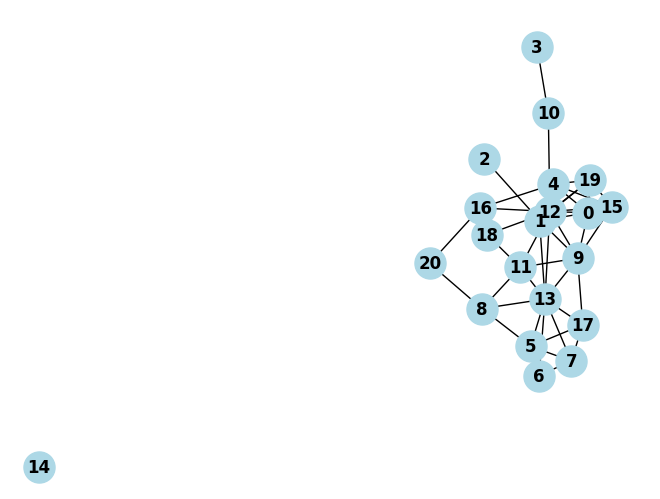

In [ ]:
# Tahap 6: Tampilkan Graf
print("\n Tampilkan Graf")
draw_graph(adj_matrix)


In [ ]:
# Tahap 7: Menghitung Nilai Centrality
chosen_method = input("\n Pilih metode centrality (degree, closeness, betweenness): ")
centrality_scores = compute_centrality(adj_matrix, chosen_method)

# Mengubah hasil centrality menjadi DataFrame
df_centrality = pd.DataFrame(list(centrality_scores.items()), columns=["Node", "Centrality Score"])

# Mengurutkan DataFrame berdasarkan 'Centrality Score' secara descending (skor tertinggi ke terendah)
df_centrality = df_centrality.sort_values(by="Centrality Score", ascending=False).reset_index(drop=True)

# Menambahkan kolom 'Rank' untuk peringkat
df_centrality['Rank'] = df_centrality.index + 1

# Menampilkan hasil centrality dengan peringkat
print(f"\n Hasil {chosen_method.capitalize()} Centrality dengan Peringkat")
print(df_centrality)


 Pilih metode centrality (degree, closeness, betweenness): betweenness

 Hasil Betweenness Centrality dengan Peringkat
    Node  Centrality Score  Rank
0     12          0.355088     1
1     13          0.270702     2
2      1          0.132193     3
3     10          0.094737     4
4      9          0.075263     5
5     16          0.054825     6
6      8          0.045614     7
7     11          0.042018     8
8      4          0.026667     9
9      5          0.017544    10
10    17          0.011404    11
11    20          0.009211    12
12     0          0.006491    13
13    15          0.004386    14
14    18          0.002632    15
15    19          0.002105    16
16     7          0.001754    17
17     6          0.000000    18
18    14          0.000000    19
19     3          0.000000    20
20     2          0.000000    21


In [ ]:
# Tahap 8: Menampilkan Ringkasan
summary = summarize(sentences, centrality_scores)
print("\n Ringkasan Berita")
print(summary)


 Ringkasan Berita
['Bagi mereka, selain menjadi jajanan yang enak, es potong legendaris ini juga semakin sulit ditemui.', '"Saya sering beli es potong ini bareng teman-teman.', 'Menggunakan bahan-bahan alami tanpa pengawet dan pewarna buatan, es potong ini menawarkan cita rasa autentik yang sulit ditemui pada es modern.']
